In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os

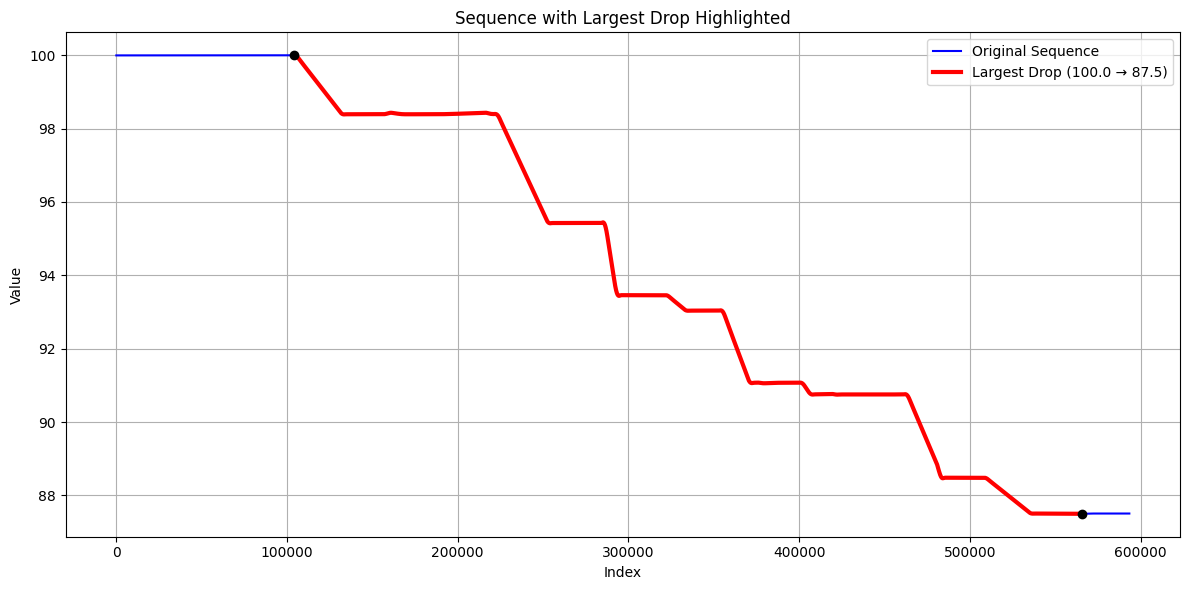

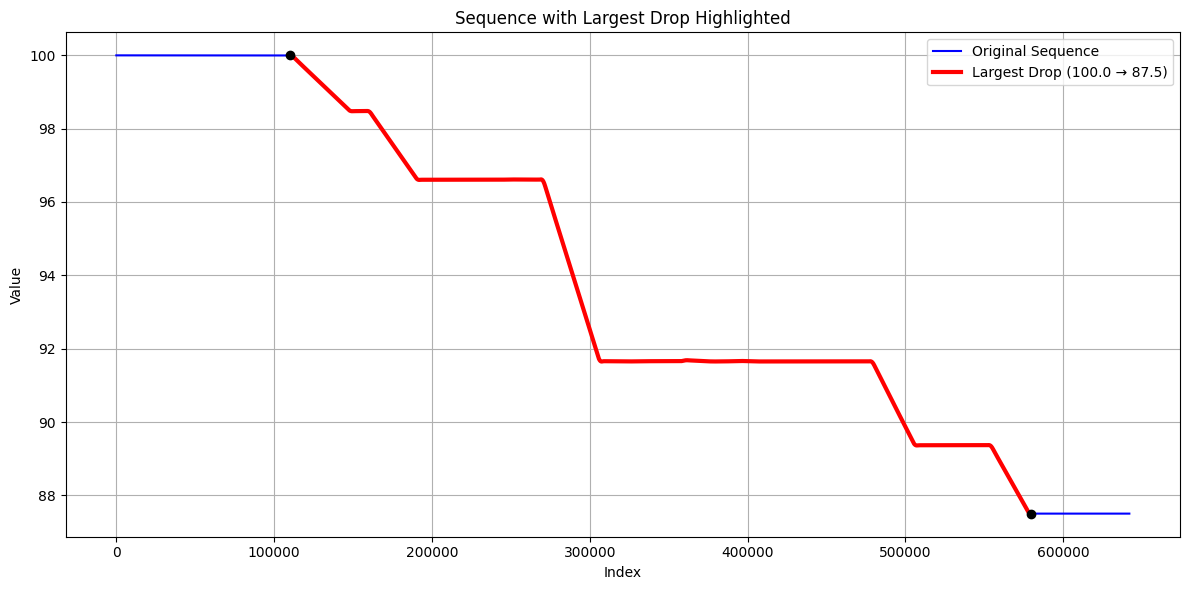

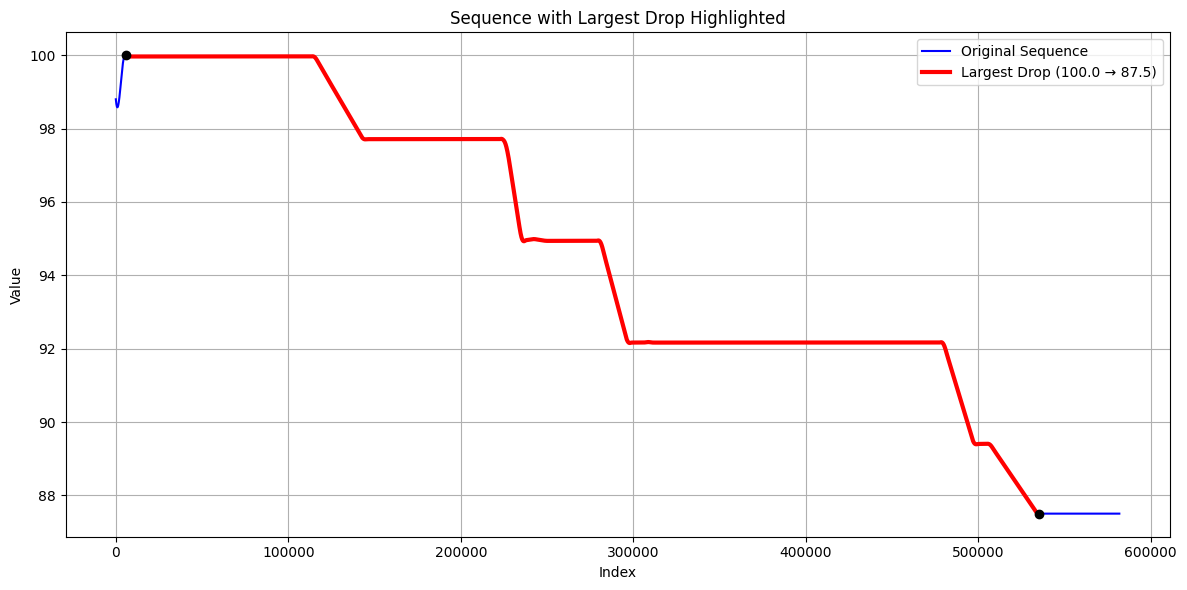

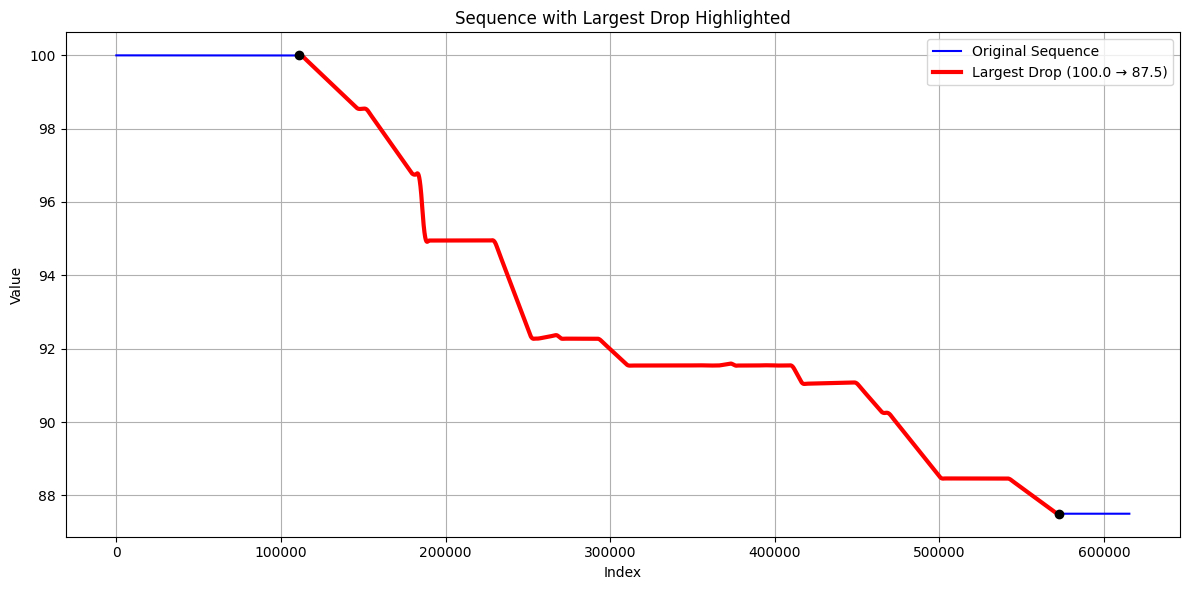

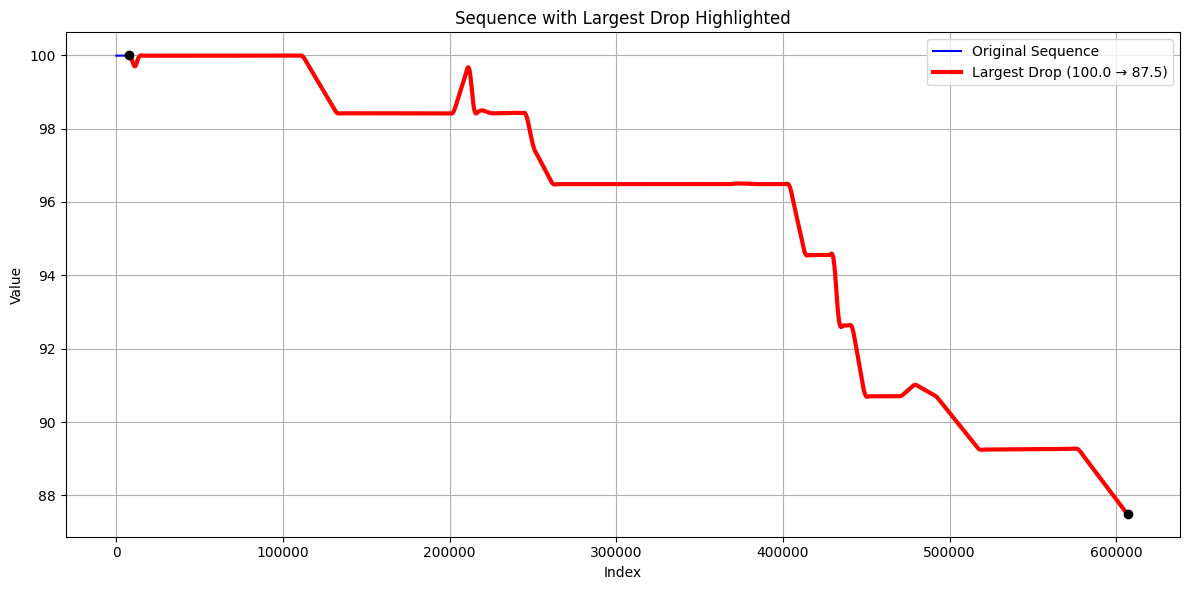

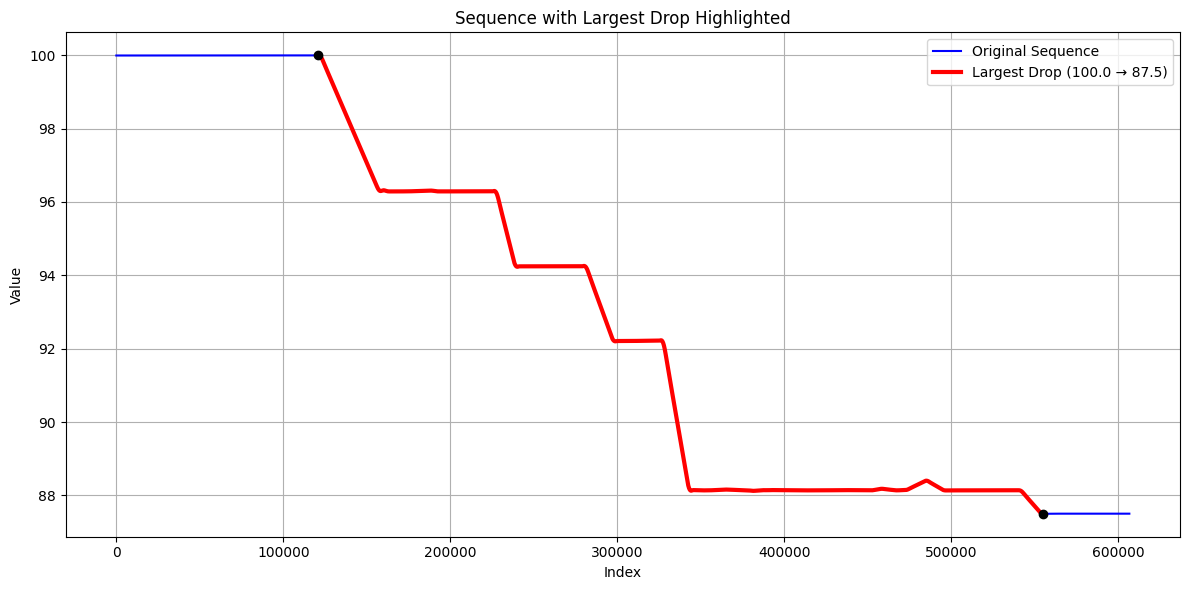

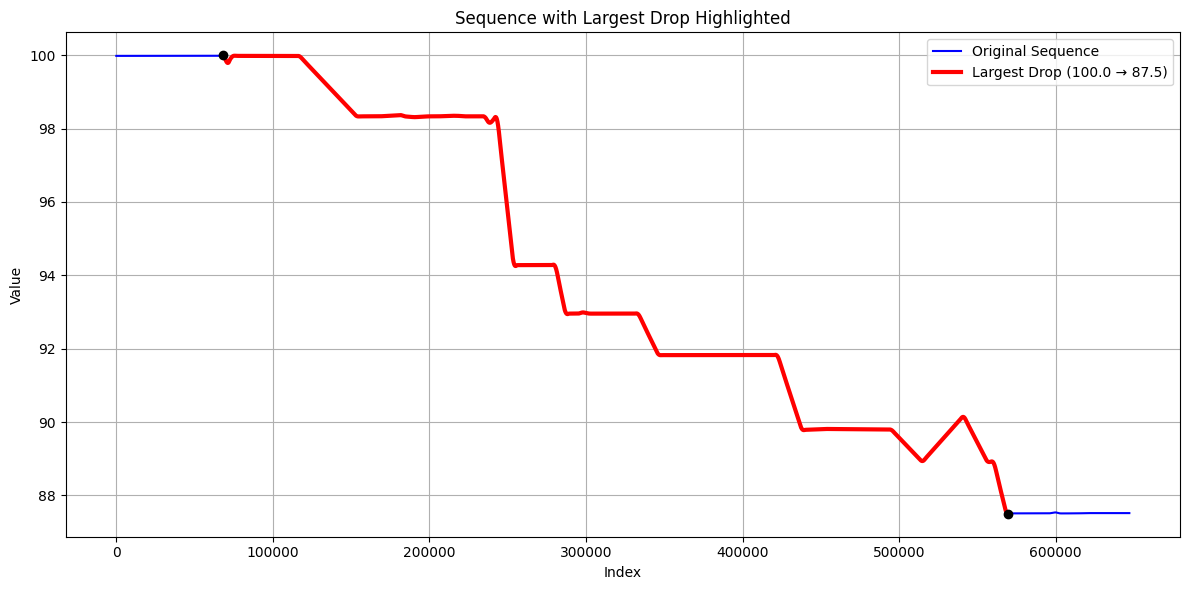

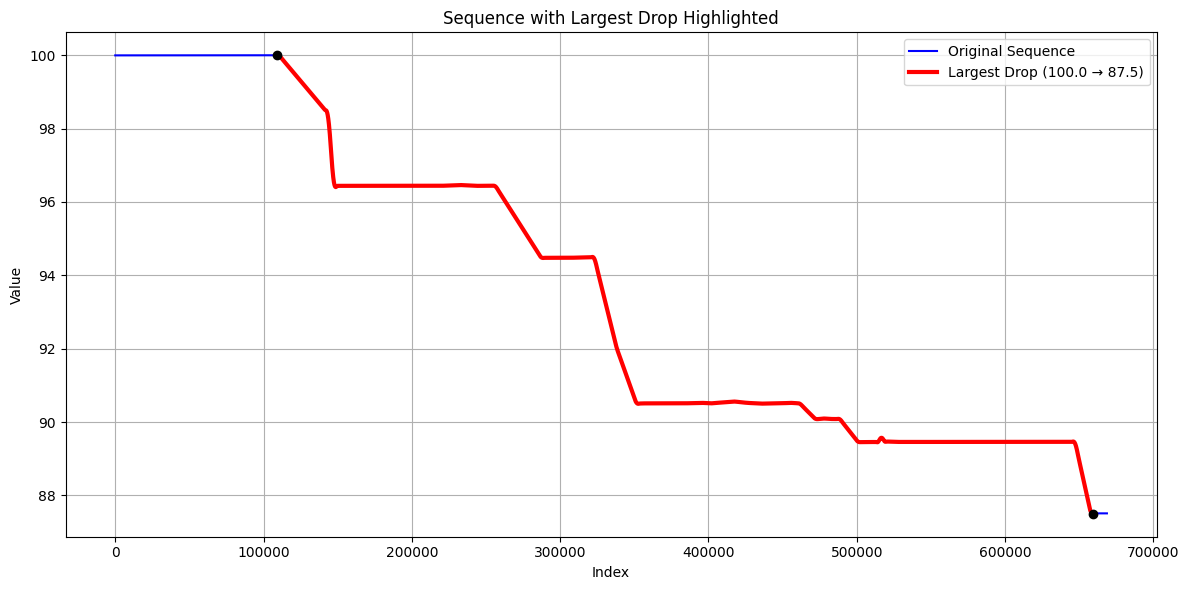

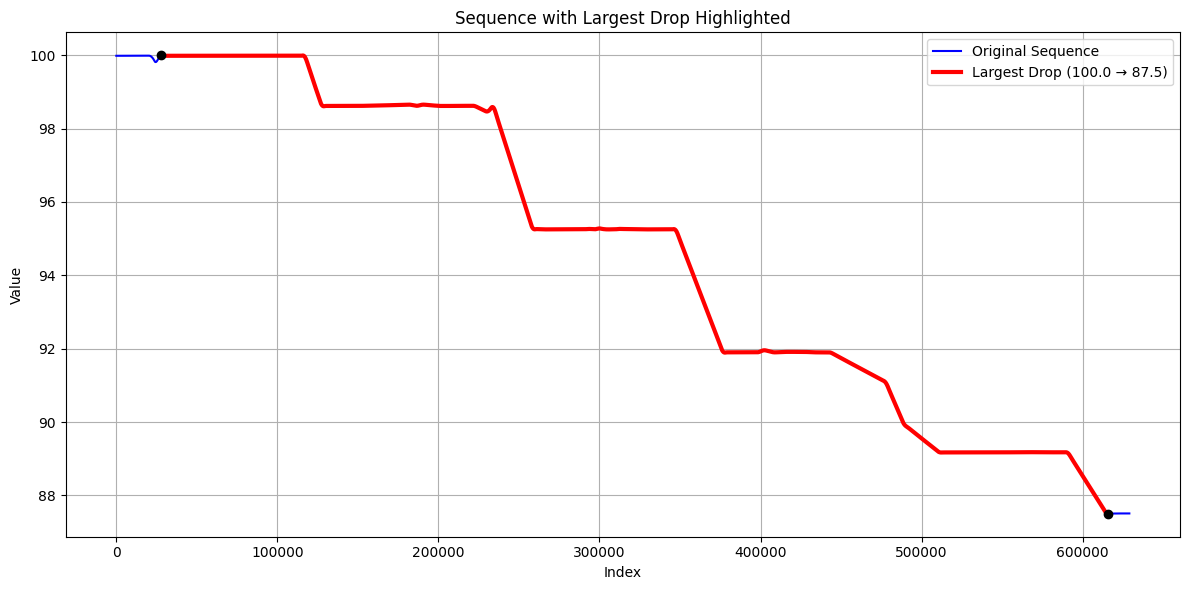

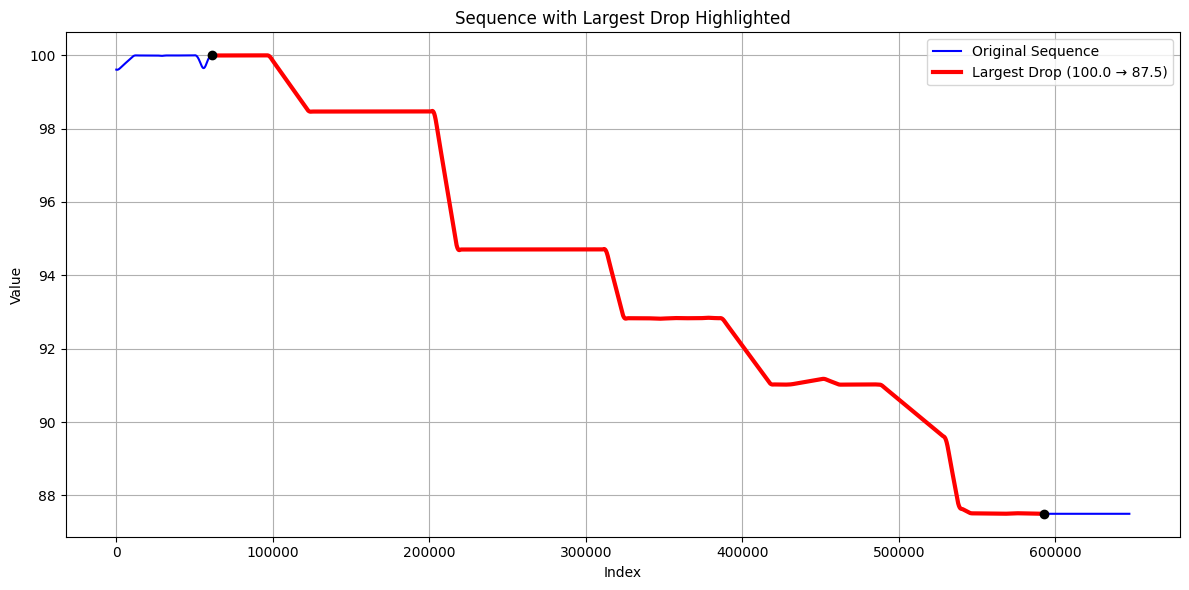

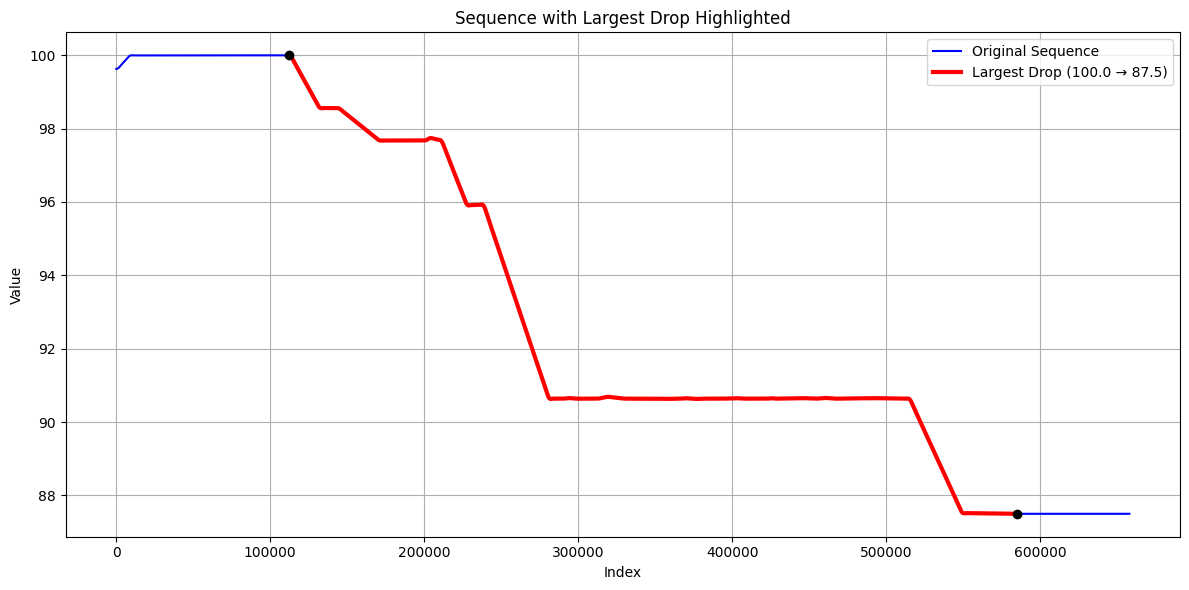

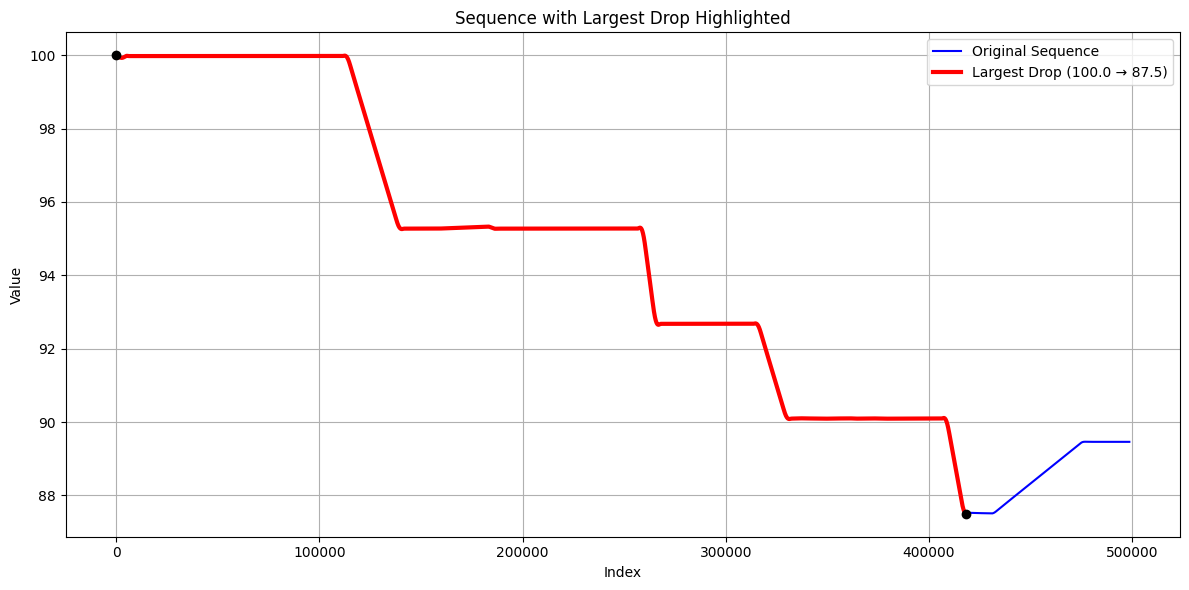

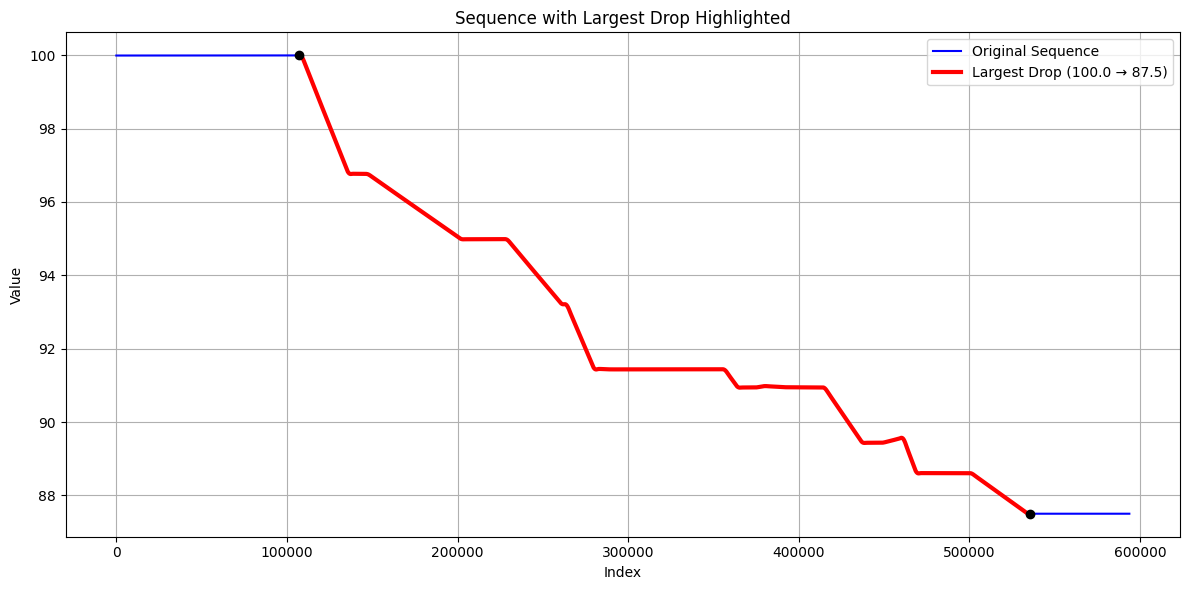

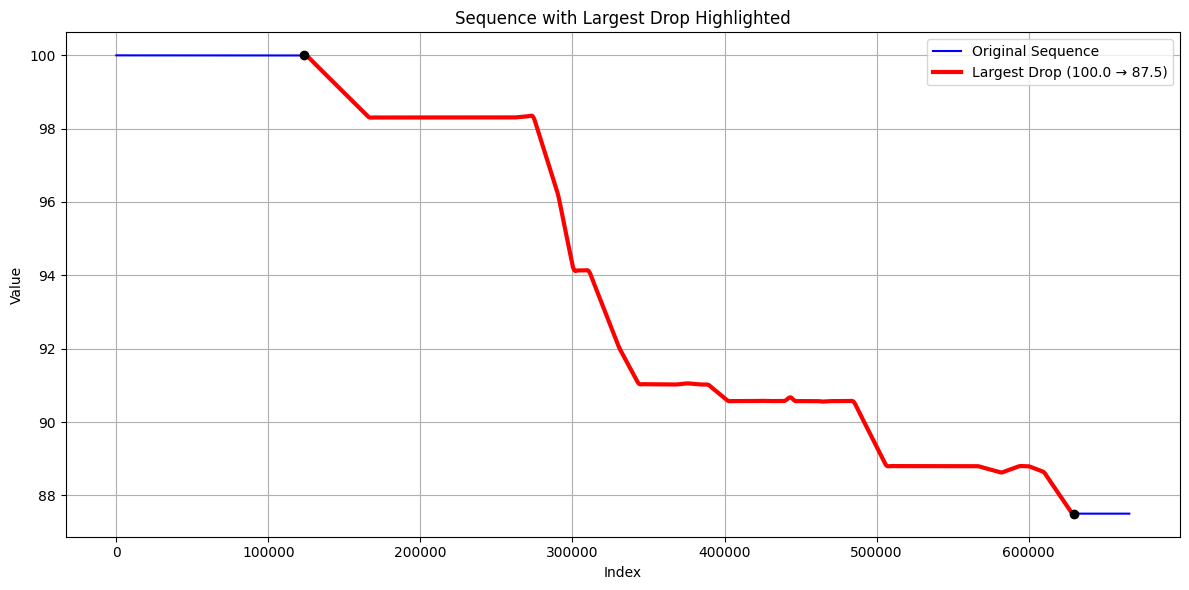

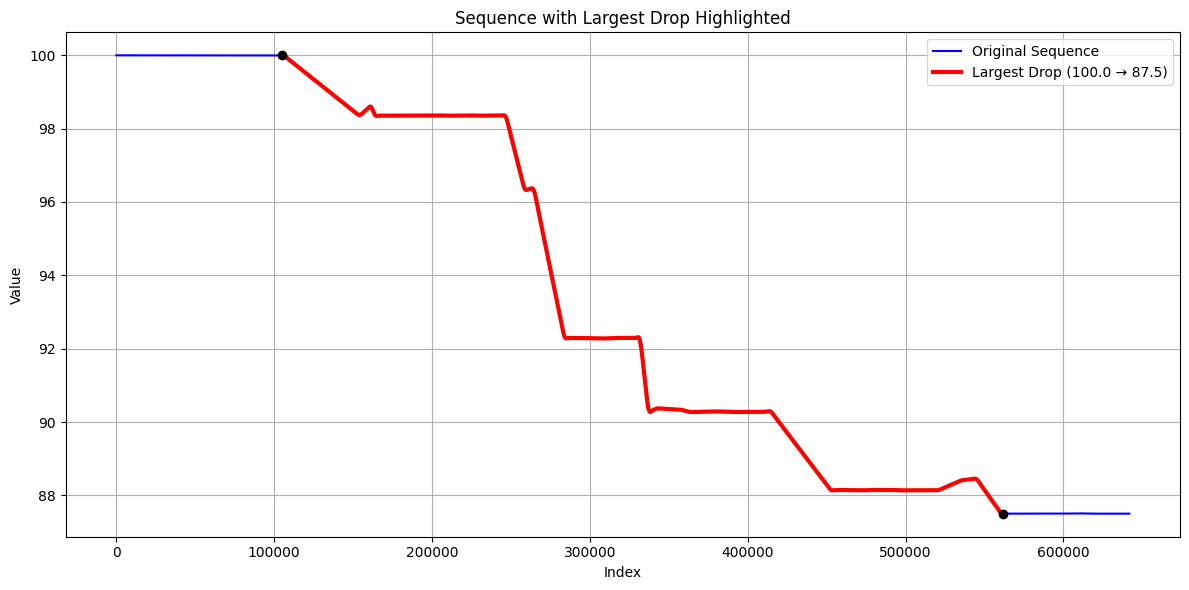

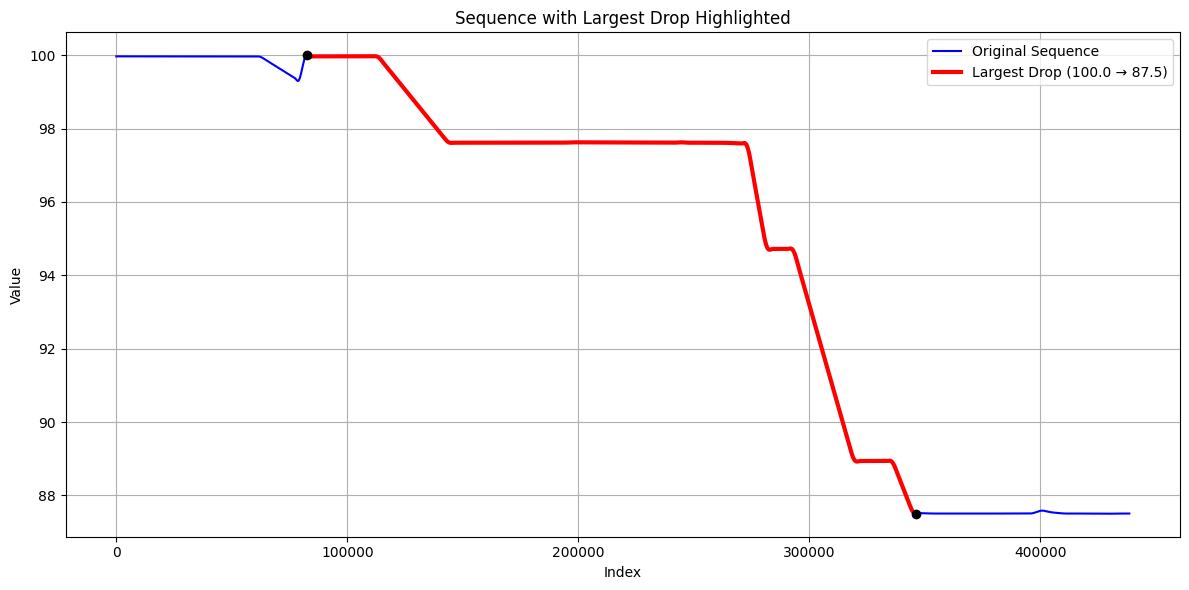

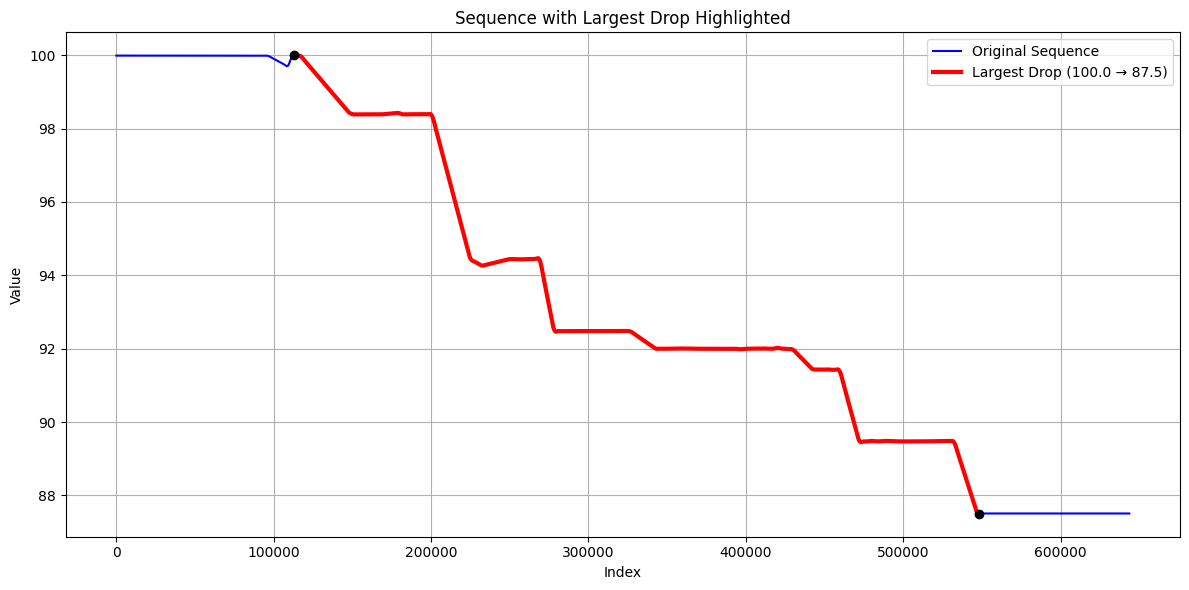

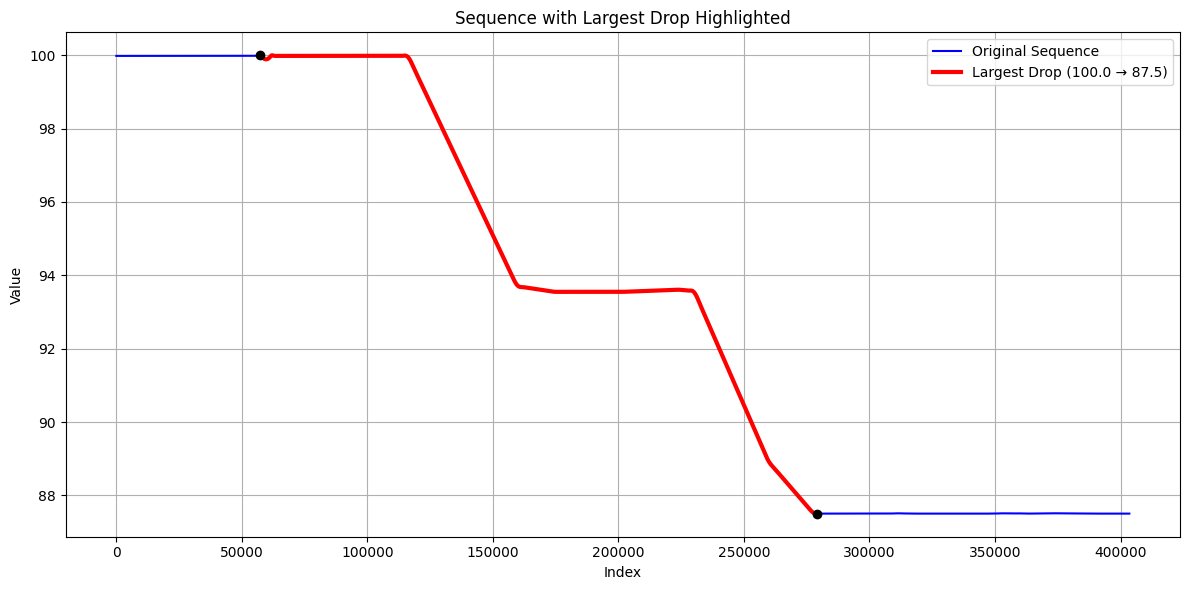

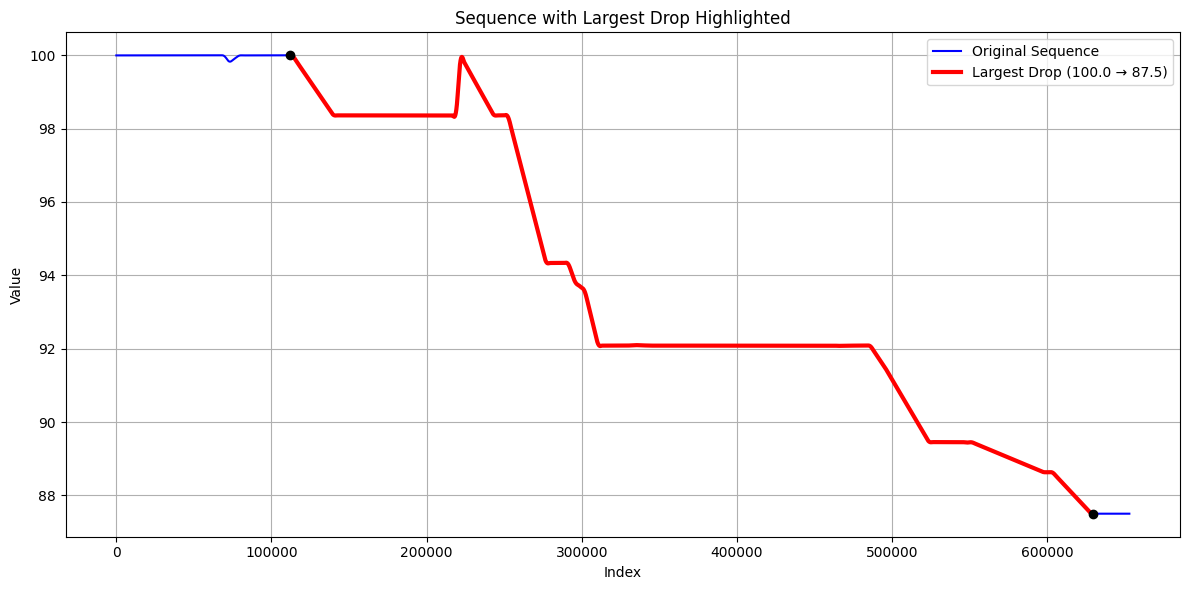

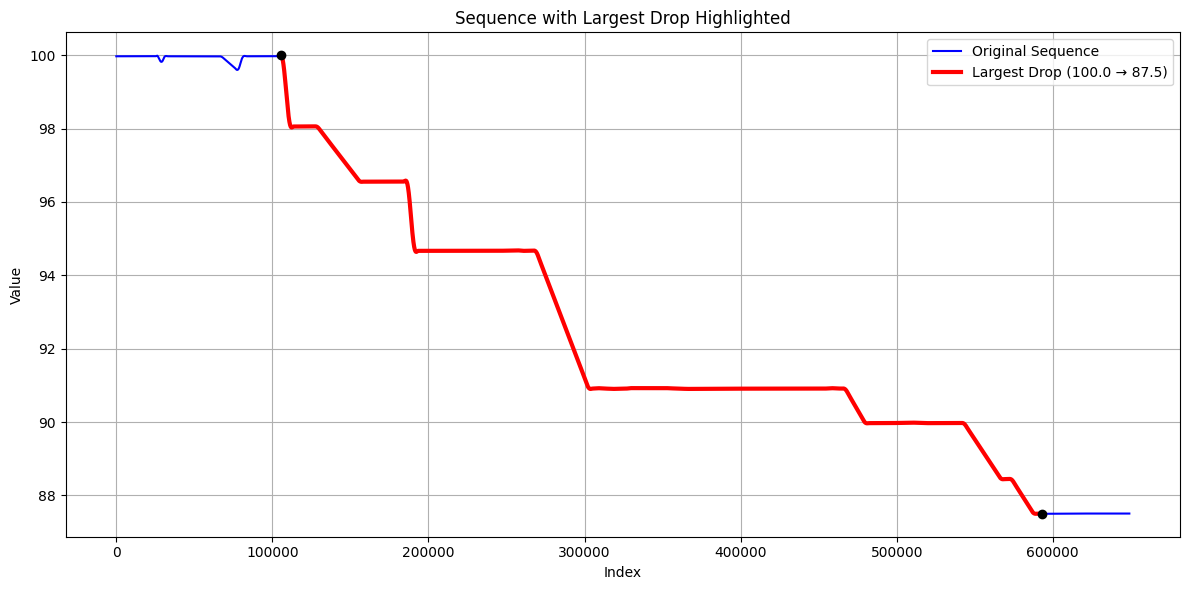

In [6]:
def find_largest_drop(seq):
    max_drop = 0
    start_idx = 0
    end_idx = 0
    max_val_idx = 0

    for i in range(1, len(seq)):
        if seq[i] > seq[max_val_idx]:
            max_val_idx = i
        else:
            drop = seq[max_val_idx] - seq[i]
            if drop > max_drop:
                max_drop = drop
                start_idx = max_val_idx
                end_idx = i

    return start_idx, end_idx, max_drop

def plot_sequence_with_largest_drop(seq):
    x = np.arange(len(seq))
    start, end, drop = find_largest_drop(seq)

    plt.figure(figsize=(12, 6))
    plt.plot(x, seq, label='Original Sequence', color='blue')
    
    if drop > 0:
        plt.plot(x[start:end+1], seq[start:end+1], color='red', linewidth=3, label=f'Largest Drop ({seq[start]} → {seq[end]})')
        plt.scatter([x[start], x[end]], [seq[start], seq[end]], color='black', zorder=5)
    else:
        plt.text(0.5, 0.5, 'No drop found', transform=plt.gca().transAxes,
                 fontsize=12, ha='center', va='center', color='gray')

    plt.title('Sequence with Largest Drop Highlighted')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def load_and_proc_data(file_list,
                       features=['pack_voltage (V)', 'charge_current (A)', 'max_temperature (℃)', 'min_temperature (℃)', 'soc', 'available_capacity (Ah)'],
                       targets = ['available_capacity (Ah)'],
                       SEQ_LEN=100, 
                       BATCH_SIZE=32,
                       model_type=None):

    for file in file_list:
        df = pd.read_csv(file)
        
        X = df[features].values
        y = df[targets[0]].values

        scaler_data = StandardScaler()
        X = scaler_data.fit_transform(X)
        y = y / 12

        plot_sequence_with_largest_drop(y)

directory = "data/battery_scaled"
file_list = csv_files = [directory+'/'+f for f in os.listdir(directory) if f.endswith(".csv")]
features = ['soc', 'pack_voltage (V)', 'charge_current (A)', 'max_cell_voltage (V)', 'min_cell_voltage (V)', 'max_temperature (℃)', 'min_temperature (℃)', 'available_capacity (Ah)']

load_and_proc_data(file_list, features=features)